In [1]:
import pandas as pd

# URL DataSets

Phishing URL Data:

In [2]:
data1 = pd.read_csv("verified_online.csv")
data1.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,7469148,https://lknbbanprlnternet.com/,http://www.phishtank.com/phish_detail.php?phis...,2022-03-22T15:09:33+00:00,yes,2022-03-22T15:11:30+00:00,yes,Other
1,7469124,https://www.acordecomhillper.com,http://www.phishtank.com/phish_detail.php?phis...,2022-03-22T15:01:47+00:00,yes,2022-03-22T15:11:30+00:00,yes,Other
2,7469102,https://www.visa-fo.serviceshop-jp.xyz/,http://www.phishtank.com/phish_detail.php?phis...,2022-03-22T15:00:10+00:00,yes,2022-03-22T15:11:30+00:00,yes,Other
3,7469097,https://uyigjl.wvjppxg.cn,http://www.phishtank.com/phish_detail.php?phis...,2022-03-22T14:58:59+00:00,yes,2022-03-22T15:03:08+00:00,yes,Other
4,7469094,https://vefdgv.eysuw0xsc.cn,http://www.phishtank.com/phish_detail.php?phis...,2022-03-22T14:57:29+00:00,yes,2022-03-22T15:03:08+00:00,yes,Other


In [3]:
data1.shape

(5462, 8)

In [4]:
phURL = data1.sample(n = 5000, random_state = 12).copy()
phURL = phURL.reset_index(drop=True)
phURL.head()

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,7446577,https://agent.gictmkdw.top/,http://www.phishtank.com/phish_detail.php?phis...,2022-02-17T16:44:29+00:00,yes,2022-02-19T21:34:48+00:00,yes,Other
1,7468013,https://provider-authentication-73698.web.app/,http://www.phishtank.com/phish_detail.php?phis...,2022-03-21T10:29:09+00:00,yes,2022-03-21T10:42:34+00:00,yes,Other
2,7458933,https://lnkd.in/drGCSGZW,http://www.phishtank.com/phish_detail.php?phis...,2022-03-07T12:42:55+00:00,yes,2022-03-07T12:52:30+00:00,yes,Internal Revenue Service
3,7393459,https://oiazeiuiazolme.blogspot.com/?m=0,http://www.phishtank.com/phish_detail.php?phis...,2021-12-22T18:10:36+00:00,yes,2021-12-22T21:53:14+00:00,yes,Other
4,5251227,http://repl-mess.myfreesites.net/,http://www.phishtank.com/phish_detail.php?phis...,2017-09-26T00:04:14+00:00,yes,2018-01-10T08:21:04+00:00,yes,Other


In [5]:
phURL.shape

(5000, 8)

 Valid URL Data:

In [6]:
data2 = pd.read_csv("Valid.csv")
data2.columns = ['URLs']
data2.head()

,URLs
0,http://1337x.to/torrent/1110018/Blackhat-2015-...
1,http://1337x.to/torrent/1122940/Blackhat-2015-...
2,http://1337x.to/torrent/1124395/Fast-and-Furio...
3,http://1337x.to/torrent/1145504/Avengers-Age-o...
4,http://1337x.to/torrent/1160078/Avengers-age-o...


In [7]:
data2.shape

(35377, 1)

In [8]:
valURL = data2.sample(n = 5000, random_state = 12).copy()
valURL = valURL.reset_index(drop=True)
valURL.head()

,URLs
0,http://graphicriver.net/search?date=this-month...
1,http://ecnavi.jp/redirect/?url=http://www.cros...
2,https://hubpages.com/signin?explain=follow+Hub...
3,http://extratorrent.cc/torrent/4190536/AOMEI+B...
4,http://icicibank.com/Personal-Banking/offers/o...


In [9]:
valURL.shape

(5000, 1)

# Feature Extraction

In [10]:
# importing the packages required:
from urllib.parse import urlparse
import ipaddress
import re

Address Bar Features:

In [11]:
# Domain of the URL

def getDomain(url):  
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
	       domain = domain.replace("www.","")
            
  return domain

In [12]:
# 2.Checks IP address in URL (yes -> phishing)

def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
    
  return ip

In [13]:
# Categorizing by Length  (long -> phishing)

def getLength(url):
    
  if len(url) < 54:
    length = 0            
  else:
    length = 1  
    
  return length

In [14]:
# Checks the “HTTPS” in the Domain Part of the URL

def httpDomain(url):
    
  domain = urlparse(url).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

In [15]:
# List of Shortening Services 

shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"


In [16]:
# Checks Shortening Services in URL

def tinyURL(url):
    match = re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

In [17]:
# Checks Prefix or Suffix Separated by "-" in the Domain

def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0           

Extracting:

In [18]:
def featureExtraction1(url, label):
    
    features = list()
    features.append(getDomain(url))
    features.append(havingIP(url))
    features.append(getLength(url))
    features.append(httpDomain(url))
    features.append(tinyURL(url))
    features.append(prefixSuffix(url))
    features.append(label)
    
    return features
    
def featureExtractionV(oldDF, newDF):
    feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
    for a in feature:
        newDF[a] = oldDF['URLs'][:].apply(lambda i: i.count(a))

def featureExtractionP(oldDF, newDF):
    feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
    for a in feature:
        newDF[a] = oldDF['url'][:].apply(lambda i: i.count(a))
    

1. For Valid URLs:

In [19]:
valid_features = list()
label = 0

for x in range(0, 5000):
    url = valURL['URLs'][x]
    valid_features.append(featureExtraction1(url, label))

In [20]:
valid_features

[['graphicriver.net', 0, 1, 0, 0, 0, 0],
 ['ecnavi.jp', 0, 1, 0, 0, 0, 0],
 ['hubpages.com', 0, 1, 0, 0, 0, 0],
 ['extratorrent.cc', 0, 1, 0, 0, 0, 0],
 ['icicibank.com', 0, 1, 0, 0, 0, 0],
 ['nypost.com', 0, 1, 0, 1, 0, 0],
 ['kienthuc.net.vn', 0, 1, 0, 0, 0, 0],
 ['thenextweb.com', 0, 1, 0, 0, 0, 0],
 ['tobogo.net', 0, 1, 0, 0, 0, 0],
 ['akhbarelyom.com', 0, 1, 0, 0, 0, 0],
 ['tunein.com', 0, 1, 0, 0, 0, 0],
 ['tune.pk', 0, 1, 0, 0, 0, 0],
 ['sfglobe.com', 0, 1, 0, 0, 0, 0],
 ['mic.com', 0, 1, 0, 0, 0, 0],
 ['thenextweb.com', 0, 1, 0, 0, 0, 0],
 ['couchtuner.eu.com', 0, 1, 0, 0, 0, 0],
 ['olx.in', 0, 1, 0, 0, 0, 0],
 ['venturebeat.com', 0, 1, 0, 1, 0, 0],
 ['allegro.pl', 0, 1, 0, 0, 0, 0],
 ['allegro.pl', 0, 1, 0, 0, 0, 0],
 ['tinnhanh360.net', 0, 1, 0, 0, 0, 0],
 ['metro.co.uk', 0, 1, 0, 0, 0, 0],
 ['atwiki.jp', 0, 1, 0, 0, 0, 0],
 ['emgn.com', 0, 1, 0, 0, 0, 0],
 ['nguyentandung.org', 0, 1, 0, 0, 0, 0],
 ['motthegioi.vn', 0, 1, 0, 0, 0, 0],
 ['spankbang.com', 0, 1, 0, 0, 0, 0],
 ['

In [21]:
# To DataFrame
feature_columns = ['Domain', 'Have_IP','Lengthy_URL', 
                   'Domain_http', 'TinyURL', 'Prefix/Suffix', 'Label']

validDF = pd.DataFrame(valid_features, columns = feature_columns)

featureExtractionV(valURL, validDF)

validDF.head()

,Domain,Have_IP,Lengthy_URL,Domain_http,TinyURL,Prefix/Suffix,Label,@,?,-,=,.,#,%,+,$,!,*,",",//
0,graphicriver.net,0,1,0,0,0,0,0,1,1,10,1,0,0,0,0,0,0,0,1
1,ecnavi.jp,0,1,0,0,0,0,0,2,1,4,4,0,2,0,0,0,0,0,2
2,hubpages.com,0,1,0,0,0,0,0,1,3,2,1,0,2,1,0,0,0,0,1
3,extratorrent.cc,0,1,0,0,0,0,0,0,0,0,4,0,5,13,0,0,0,0,1
4,icicibank.com,0,1,0,0,0,0,0,1,6,1,2,0,0,0,0,0,0,0,1


In [22]:
validDF.to_csv('validDf.csv', index = False)

2. For Phishing URLs:

In [23]:
phish_features = list()
label = 1
for x in range(0, 5000):
    url = phURL['url'][x]
    phish_features.append(featureExtraction1(url, label))

In [24]:
phish_features

[['agent.gictmkdw.top', 0, 0, 0, 0, 0, 1],
 ['provider-authentication-73698.web.app', 0, 0, 0, 0, 1, 1],
 ['lnkd.in', 0, 0, 0, 1, 0, 1],
 ['oiazeiuiazolme.blogspot.com', 0, 0, 0, 1, 0, 1],
 ['repl-mess.myfreesites.net', 0, 0, 0, 0, 1, 1],
 ['bit.ly', 0, 0, 0, 1, 0, 1],
 ['cognitoforms.com', 0, 0, 0, 0, 0, 1],
 ['msceoeir.icu', 0, 0, 0, 0, 0, 1],
 ['cutt.ly', 0, 0, 0, 0, 0, 1],
 ['u1604676.cp.regruhosting.ru', 0, 1, 0, 0, 0, 1],
 ['viettel-com-dot-c2c01-531c7.uc.r.appspot.com', 0, 0, 0, 1, 1, 1],
 ['sites.google.com', 0, 0, 0, 0, 0, 1],
 ['sumbersarijaya.desa.id', 0, 1, 0, 0, 0, 1],
 ['eu.questionpro.com', 0, 0, 0, 0, 0, 1],
 ['qualitasc-my.sharepoint.com', 0, 1, 0, 1, 1, 1],
 ['www-cursosdigitalesmx-com.filesusr.com', 0, 1, 0, 0, 1, 1],
 ['helf.com', 0, 0, 0, 0, 0, 1],
 ['soaringskiesrentals.com', 0, 1, 0, 0, 0, 1],
 ['selector26.gg', 0, 0, 0, 0, 0, 1],
 ['wires-business-starter.webflow.io', 0, 0, 0, 0, 1, 1],
 ['demo2.cloudwp.dev', 0, 1, 0, 0, 0, 1],
 ['bakhai.vn', 0, 1, 0, 0, 0, 1],


In [25]:
# converting to DataFrame:

phishingDF = pd.DataFrame(phish_features, columns = feature_columns)

featureExtractionP(phURL, phishingDF)

phishingDF.head()

,Domain,Have_IP,Lengthy_URL,Domain_http,TinyURL,Prefix/Suffix,Label,@,?,-,=,.,#,%,+,$,!,*,",",//
0,agent.gictmkdw.top,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,1
1,provider-authentication-73698.web.app,0,0,0,0,1,1,0,0,2,0,2,0,0,0,0,0,0,0,1
2,lnkd.in,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,oiazeiuiazolme.blogspot.com,0,0,0,1,0,1,0,1,0,1,2,0,0,0,0,0,0,0,1
4,repl-mess.myfreesites.net,0,0,0,0,1,1,0,0,1,0,2,0,0,0,0,0,0,0,1


In [26]:
phishingDF.to_csv('phishingDF.csv', index = False)

Final DataSet:

In [27]:
# combining both the Data Frames:

finalData = pd.concat([validDF, phishingDF]).reset_index(drop = True)
finalData.head()


,Domain,Have_IP,Lengthy_URL,Domain_http,TinyURL,Prefix/Suffix,Label,@,?,-,=,.,#,%,+,$,!,*,",",//
0,graphicriver.net,0,1,0,0,0,0,0,1,1,10,1,0,0,0,0,0,0,0,1
1,ecnavi.jp,0,1,0,0,0,0,0,2,1,4,4,0,2,0,0,0,0,0,2
2,hubpages.com,0,1,0,0,0,0,0,1,3,2,1,0,2,1,0,0,0,0,1
3,extratorrent.cc,0,1,0,0,0,0,0,0,0,0,4,0,5,13,0,0,0,0,1
4,icicibank.com,0,1,0,0,0,0,0,1,6,1,2,0,0,0,0,0,0,0,1


In [28]:
finalData.tail()

,Domain,Have_IP,Lengthy_URL,Domain_http,TinyURL,Prefix/Suffix,Label,@,?,-,=,.,#,%,+,$,!,*,",",//
9995,shop.cmfurnituremall.com,0,1,0,0,0,1,1,1,0,1,4,0,0,0,0,0,0,0,1
9996,fidelitybank-mn.net,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1
9997,services.runescape.com-as.cz,0,0,0,0,1,1,0,0,1,0,3,0,0,0,0,0,0,0,1
9998,noisy-cake-47d3.nh29901021139.workers.dev,0,0,0,0,1,1,0,0,2,0,3,0,0,0,0,0,0,0,1
9999,top10songsnews.com,0,1,0,0,0,1,0,1,0,0,2,0,0,0,0,0,0,0,1


In [29]:
# Shuffling the Rows:

finalData1 = finalData.sample(frac = 1, 
                             random_state = 1).reset_index(drop = True)
finalData1.head()

,Domain,Have_IP,Lengthy_URL,Domain_http,TinyURL,Prefix/Suffix,Label,@,?,-,=,.,#,%,+,$,!,*,",",//
0,feed4animlesgho-co-uk.stackstaging.com,0,1,0,0,1,1,0,0,4,0,3,0,0,0,0,0,0,0,1
1,qz.com,0,1,0,0,0,0,0,0,13,0,1,0,0,0,0,0,0,0,1
2,twitter.com,0,1,0,0,0,0,0,1,1,1,2,0,65,6,0,0,0,0,1
3,motthegioi.vn,0,1,0,0,0,0,0,0,14,0,2,0,0,0,0,0,0,0,1
4,lihi1.cc,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1


In [30]:
finalData1.to_csv('FinalDF', index = False)

# Training Models:

Test and Train Split:

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [32]:

X = finalData1.drop(['Domain', 'Label'], axis=1)
y = finalData1['Label']
X.head()

,Have_IP,Lengthy_URL,Domain_http,TinyURL,Prefix/Suffix,@,?,-,=,.,#,%,+,$,!,*,",",//
0,0,1,0,0,1,0,0,4,0,3,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,13,0,1,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,1,1,1,2,0,65,6,0,0,0,0,1
3,0,1,0,0,0,0,0,14,0,2,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [33]:
y.head()

0    1
1    0
2    0
3    0
4    1
Name: Label, dtype: int64

In [34]:
scale = StandardScaler().fit(X)
scaledX = scale.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, 
                                                   random_state=400)

Training Models:

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


**********************************************************
<class 'sklearn.linear_model._logistic.LogisticRegression'>

Test Accuracy:  91.5
Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       507
           1       0.92      0.91      0.91       493

    accuracy                           0.92      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.92      0.92      0.91      1000



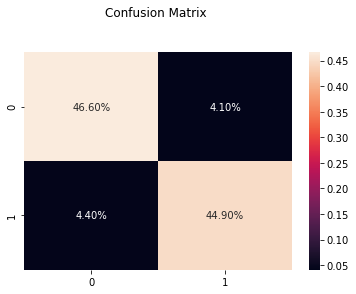

************************.*.*.*.*.**************************


In [36]:
test_accuracy = list()

print("**********************************************************")
print(str(LogisticRegression) + "\n")
    
model_l = LogisticRegression(max_iter = 200)
model_l.fit(X_train, y_train)
    
pred = model_l.predict(X_test)
    
accScore = accuracy_score(y_test, pred)
test_accuracy.append(accScore)
    
conf_mat = confusion_matrix(y_test, pred)
    
print("Test Accuracy: ", accScore*100, end="\n")
print("Classification Report: ")
print(classification_report(y_test, pred))
    
    
ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='0.2%')

ax.set_title('Confusion Matrix \n\n')
    
plt.show()
    
print("************************.*.*.*.*.**************************")

**********************************************************
<class 'sklearn.tree._classes.DecisionTreeClassifier'>

Test Accuracy:  97.2
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       507
           1       0.97      0.97      0.97       493

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



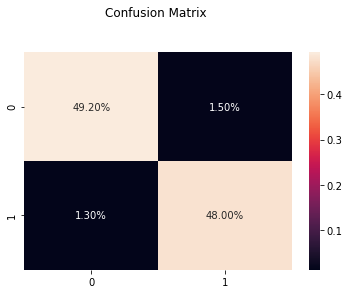

************************.*.*.*.*.**************************


In [37]:

print("**********************************************************")
print(str(DecisionTreeClassifier) + "\n")
    
model_d = DecisionTreeClassifier()
model_d.fit(X_train, y_train)
    
pred = model_d.predict(X_test)
    
accScore = accuracy_score(y_test, pred)
test_accuracy.append(accScore)
    
conf_mat = confusion_matrix(y_test, pred)
    
print("Test Accuracy: ", accScore*100, end="\n")
print("Classification Report: ")
print(classification_report(y_test, pred))
    
    
ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='0.2%')

ax.set_title('Confusion Matrix \n\n')
    
plt.show()
    
print("************************.*.*.*.*.**************************")

**********************************************************
<class 'sklearn.ensemble._forest.RandomForestClassifier'>

Test Accuracy:  97.5
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       507
           1       0.97      0.98      0.97       493

    accuracy                           0.97      1000
   macro avg       0.97      0.98      0.97      1000
weighted avg       0.98      0.97      0.98      1000



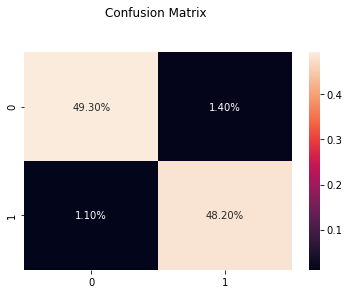

************************.*.*.*.*.**************************


In [38]:
print("**********************************************************")
print(str(RandomForestClassifier) + "\n")
    
model_r = RandomForestClassifier()
model_r.fit(X_train, y_train)
    
pred = model_r.predict(X_test)
    
accScore = accuracy_score(y_test, pred)
test_accuracy.append(accScore)
    
conf_mat = confusion_matrix(y_test, pred)
    
print("Test Accuracy: ", accScore*100, end="\n")
print("Classification Report: ")
print(classification_report(y_test, pred))
    
    
ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='0.2%')

ax.set_title('Confusion Matrix \n\n')
    
plt.show()
    
print("************************.*.*.*.*.**************************")

**********************************************************
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>

Test Accuracy:  96.6
Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       507
           1       0.97      0.97      0.97       493

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



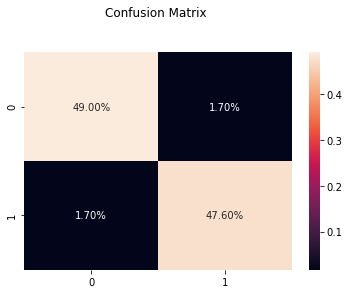

************************.*.*.*.*.**************************

 [0.915, 0.972, 0.975, 0.966]


In [39]:

print("**********************************************************")
print(str(KNeighborsClassifier) + "\n")
    
model_kn = KNeighborsClassifier()
model_kn.fit(X_train, y_train)
    
pred = model_kn.predict(X_test)
    
accScore = accuracy_score(y_test, pred)
test_accuracy.append(accScore)
    
conf_mat = confusion_matrix(y_test, pred)
    
print("Test Accuracy: ", accScore*100, end="\n")
print("Classification Report: ")
print(classification_report(y_test, pred))
    
    
ax = sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='0.2%')

ax.set_title('Confusion Matrix \n\n')
    
plt.show()
    
print("************************.*.*.*.*.**************************")

print("\n", test_accuracy)

# GUI:

In [40]:
import tkinter as tk
from tkinter import *
from PIL import Image, ImageTk

In [52]:
dfCopied = pd.DataFrame()

def getInputBoxValue():
    userInput = url_input.get()
    return userInput

def btnClickFunction():
    urlToCheck = getInputBoxValue()
    if len(urlToCheck.strip(" ")) == 0:
        return
    
    dataToCheck = featureExtraction1(urlToCheck, 0) # list
    
    result_dict = predictNew(dataToCheck, urlToCheck)
    insertResult(result_dict, urlToCheck)

    
def insertResult(result_dict, url):
    global copiedDF
    resultBox.delete(1.0, 'end')
    resultBox.insert('end', "{0}".format(url) + "\n")
    for key, value in result_dict.items():
        resultBox.insert('end', "{0} : {1}".format(key, value) + "\n")
    resultBox.insert('end',"\n" + " Features: " + "\n")
    resultBox.insert('end', str(copiedDF) + "\n")


def cleanIt():
    url_input.delete(0, 'end')
    resultBox.delete(1.0, 'end')

def predictNew(dataToCheck, urlToCheck):
    global copiedDF
    predicted = dict()
    
    listToCheck = list()
    listToCheck.append(dataToCheck)
    
    checkDF = pd.DataFrame(listToCheck, columns = feature_columns)
    copiedDF = checkDF
    
    urlGot = [urlToCheck.strip(" ")]
    urlGotDF = pd.DataFrame([urlGot], columns=['url'])
    featureExtractionP(urlGotDF, checkDF)
    
    
    data = checkDF.drop(['Domain', 'Label'], axis=1)
    

    # Linear Regression 
    p_val = model_l.predict(data)
    
    if p_val == 1:
        predicted['Linear Regression'] = 'Malicious'
    elif p_val == 0:
        predicted['Linear Regression'] = 'Benign'
    
    
     # DecisionTreeClassifier
    p_val = model_d.predict(data)
    
    if p_val == 1:
        predicted['DecisionTreeClassifier'] = 'Malicious'
    elif p_val == 0:
        predicted['DecisionTreeClassifier'] = 'Benign'
    
    
     # RandomForestClassifier
    p_val = model_r.predict(data)
    
    if p_val == 1:
        predicted['RandomForestClassifier'] = 'Malicious'
    elif p_val == 0:
        predicted['RandomForestClassifier'] = 'Benign'
    
    
     # KNeighborsClassifier  
    p_val = model_kn.predict(data)
    
    if p_val == 1:
        predicted['KNeighborsClassifier'] = 'Malicious'
    elif p_val == 0:
        predicted['KNeighborsClassifier'] = 'Benign'
    
    return predicted


root = Tk()
root.geometry('900x430')
root.title('URLSniff')


bgImg = Image.open("bgimg1.png")
pic = ImageTk.PhotoImage(bgImg)

frame1 = Frame(root)
frame1.place(height=430, width=900)

l3 = Label(frame1, image = pic).place(height=430, width=900)

l1 = Label(l3, text='URLSniff', bg='#DC143C', font=('arial', 28, 'bold')).place(x=23, y=19)

l2 = Label(l3, text='Enter URL:', bg='#DC143C', font=('courier', 18, 'bold')).place(x=31, y=114)



url_input=Entry(frame1,  font=('arial', 14))
url_input.place(x=32, y=150, height=40, width=800)

checkBut = Button(frame1, text='Check', bg='#BF3EFF', font=('arial', 16, 'bold'), command=btnClickFunction)
checkBut.place(x=31, y=230, width=130)

clearBut = Button(frame1, text='Clean', bg='#BF3EFF', font=('arial', 16, 'bold'), command=cleanIt)
clearBut.place(x=31, y=290, width=130)

resultBox = tk.Text(frame1, bg='grey28', fg='white')
resultBox.place(x=170, y=200, height=200, width=660)



root.mainloop()


# END